In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [3]:
df=pd.read_csv('dataset/fifa_0315.csv', index_col=0)
df.head()

,Name,Age,Overall,Potential,Club,Value,Wage,Club_4W,Club_4V,Position_Class,...,Age_C,Over_C,Position_Score,Special_Score1,Special_Score2,Special_Score3,Special_Score4,Special_Score5,Special_Score6,Real_Face
0,L. Messi,31,94,94,FC Barcelona,110500.0,565.0,3,3,Forward,...,6,18,93.0,2298.0,2202,2298.0,2296,2392.0,2486.0,1
1,Cristiano Ronaldo,33,94,94,Juventus,77000.0,405.0,3,3,Forward,...,7,18,93.0,2323.0,2228,2323.0,2322,2417.0,2511.0,1
2,Neymar Jr,26,92,93,Paris Saint-Germain,118500.0,290.0,3,3,Forward,...,4,17,90.0,2237.0,2143,2237.0,2236,2330.0,2422.0,1
4,K. De Bruyne,27,91,92,Manchester City,102000.0,355.0,3,3,Midfielder,...,5,16,91.0,2369.0,2281,2369.0,2373,2461.0,2552.0,1
5,E. Hazard,27,91,91,Chelsea,93000.0,340.0,3,3,Forward,...,5,16,89.0,2233.0,2142,2233.0,2233,2324.0,2415.0,1


In [6]:
df.columns

Index(['Name', 'Age', 'Overall', 'Potential', 'Club', 'Value', 'Wage',
       'Club_4W', 'Club_4V', 'Position_Class', 'Special',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Composure', 'Loaned', 'Age_C', 'Over_C', 'Position_Score',
       'Special_Score1', 'Special_Score2', 'Special_Score3', 'Special_Score4',
       'Special_Score5', 'Special_Score6', 'Real_Face'],
      dtype='object')

In [8]:
df.drop(['Potential', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Position','Loaned From', 'Contract Valid Until','Position_Score',
        'Special_Score1', 'Special_Score2', 'Special_Score3', 'Special_Score4','Special_Score6'],axis=1, inplace=True)

In [9]:
club1=df[df.Club=='Real Madrid'].sort_values(by='Wage', ascending=False)
club1

,Name,Age,Overall,Club,Value,Wage,Club_4W,Club_4V,Position_Class,Special,Jersey Number,Joined,Composure,Loaned,Age_C,Over_C,Special_Score5,Real_Face
6,L. Modrić,32,91,Real Madrid,67000.0,420.0,3,3,Midfielder,2280,10.0,2012-08-01,84.0,1,7,16,2455.0,1
8,Sergio Ramos,32,91,Real Madrid,51000.0,380.0,3,3,Defender,2201,15.0,2005-08-01,82.0,1,7,16,2374.0,1
11,T. Kroos,28,90,Real Madrid,76500.0,355.0,3,3,Midfielder,2190,8.0,2014-07-17,85.0,1,5,15,2365.0,1
36,G. Bale,28,88,Real Madrid,60000.0,355.0,3,3,Forward,2279,11.0,2013-09-02,86.0,1,5,13,2453.0,1
30,Isco,26,88,Real Madrid,73500.0,315.0,3,3,Forward,2137,22.0,2013-07-03,86.0,1,4,13,2314.0,1
27,Casemiro,26,88,Real Madrid,59500.0,285.0,3,3,Defender,2170,14.0,2013-07-11,84.0,1,4,13,2344.0,1
35,Marcelo,30,88,Real Madrid,43000.0,285.0,3,3,Defender,2279,12.0,2007-01-01,86.0,1,6,13,2453.0,1
19,T. Courtois,26,89,Real Madrid,53500.0,240.0,3,3,GoalKeeper,1311,1.0,2018-08-09,66.0,1,4,14,1467.0,1
105,K. Benzema,30,85,Real Madrid,37000.0,240.0,3,3,Forward,2000,9.0,2009-07-09,79.0,1,6,10,2164.0,1
79,Marco Asensio,22,85,Real Madrid,54000.0,215.0,3,3,Forward,2050,10.0,2015-07-01,83.0,1,2,10,2225.0,1


In [11]:
club2=df[df.Club=='FC Barcelona'].sort_values(by='Wage', ascending=False)
club2

,Name,Age,Overall,Club,Value,Wage,Club_4W,Club_4V,Position_Class,Special,Jersey Number,Joined,Composure,Loaned,Age_C,Over_C,Special_Score5,Real_Face
0,L. Messi,31,94,FC Barcelona,110500.0,565.0,3,3,Forward,2202,10.0,2004-07-01,96.0,1,6,18,2392.0,1
7,L. Suárez,31,91,FC Barcelona,80000.0,455.0,3,3,Forward,2346,9.0,2014-07-11,85.0,1,6,16,2522.0,1
32,Coutinho,26,88,FC Barcelona,69500.0,340.0,3,3,Forward,2175,7.0,2018-01-06,85.0,1,4,13,2349.0,1
20,Sergio Busquets,29,89,FC Barcelona,51500.0,315.0,3,3,Defender,2065,5.0,2008-09-01,90.0,1,5,14,2244.0,1
53,I. Rakitić,30,87,FC Barcelona,46500.0,260.0,3,3,Midfielder,2184,4.0,2014-07-01,81.0,1,6,12,2352.0,1
49,Jordi Alba,29,87,FC Barcelona,38000.0,250.0,3,3,Defender,2230,18.0,2012-07-01,79.0,1,5,12,2396.0,1
54,Piqué,31,87,FC Barcelona,34000.0,240.0,3,3,Defender,1950,3.0,2008-07-01,86.0,1,6,12,2123.0,1
18,M. ter Stegen,26,89,FC Barcelona,58000.0,240.0,3,3,GoalKeeper,1328,22.0,2014-07-01,69.0,1,4,14,1489.0,1
42,S. Umtiti,24,87,FC Barcelona,57000.0,205.0,3,3,Defender,2147,23.0,2016-07-12,82.0,1,3,12,2321.0,1
96,A. Vidal,31,85,FC Barcelona,26000.0,205.0,3,3,Midfielder,2230,8.0,2018-08-06,81.0,1,6,10,2396.0,1


In [12]:
club3=df[df.Club=='Manchester City'].sort_values(by='Wage', ascending=False)
club3

,Name,Age,Overall,Club,Value,Wage,Club_4W,Club_4V,Position_Class,Special,Jersey Number,Joined,Composure,Loaned,Age_C,Over_C,Special_Score5,Real_Face
4,K. De Bruyne,27,91,Manchester City,102000.0,355.0,3,3,Midfielder,2281,7.0,2015-08-30,88.0,1,5,16,2461.0,1
23,S. Agüero,30,89,Manchester City,64500.0,300.0,3,3,Forward,2107,10.0,2011-07-28,90.0,1,6,14,2286.0,1
13,David Silva,32,90,Manchester City,60000.0,285.0,3,3,Midfielder,2115,21.0,2010-07-14,93.0,1,7,15,2298.0,1
84,R. Mahrez,27,85,Manchester City,40500.0,205.0,3,3,Forward,2031,26.0,2018-07-10,86.0,1,5,10,2202.0,1
55,L. Sané,22,86,Manchester City,61000.0,195.0,3,3,Forward,2090,19.0,2016-08-02,78.0,1,2,11,2260.0,1
60,R. Sterling,23,86,Manchester City,56500.0,195.0,3,3,Forward,2036,10.0,2015-07-14,77.0,1,3,11,2202.0,1
75,Fernandinho,33,86,Manchester City,18000.0,185.0,3,3,Defender,2183,25.0,2013-07-01,79.0,1,7,11,2348.0,1
56,Bernardo Silva,23,86,Manchester City,59500.0,180.0,3,3,Forward,2039,11.0,2017-07-01,85.0,1,3,11,2215.0,1
136,I. Gündoğan,27,84,Manchester City,32000.0,175.0,3,3,Midfielder,2138,21.0,2016-07-01,87.0,1,5,9,2309.0,1
89,N. Otamendi,30,85,Manchester City,28500.0,170.0,3,3,Defender,1916,30.0,2015-08-20,80.0,1,6,10,2081.0,1


In [13]:
club4=df[df.Club=='Juventus'].sort_values(by='Wage', ascending=False)
club4

,Name,Age,Overall,Club,Value,Wage,Club_4W,Club_4V,Position_Class,Special,Jersey Number,Joined,Composure,Loaned,Age_C,Over_C,Special_Score5,Real_Face
1,Cristiano Ronaldo,33,94,Juventus,77000.0,405.0,3,3,Forward,2228,7.0,2018-07-10,95.0,1,7,18,2417.0,1
24,G. Chiellini,33,89,Juventus,27000.0,215.0,3,3,Defender,1841,3.0,2005-07-01,84.0,1,7,14,2014.0,1
15,P. Dybala,24,89,Juventus,89000.0,205.0,3,3,Forward,2092,21.0,2015-07-01,84.0,1,3,14,2270.0,1
72,M. Pjanić,28,86,Juventus,44000.0,180.0,3,3,Defender,2182,5.0,2016-07-01,86.0,1,5,11,2354.0,1
65,Douglas Costa,27,86,Juventus,46500.0,175.0,3,3,Midfielder,2111,11.0,2018-07-01,84.0,1,5,11,2281.0,1
64,Alex Sandro,27,86,Juventus,36500.0,160.0,3,3,Defender,2198,12.0,2015-08-21,82.0,1,5,11,2366.0,1
70,L. Bonucci,31,86,Juventus,30000.0,160.0,3,3,Defender,1978,19.0,2018-08-02,86.0,1,6,11,2150.0,1
73,M. Benatia,31,86,Juventus,30000.0,160.0,3,3,Defender,1803,4.0,2014-08-26,82.0,1,6,11,1971.0,1
99,S. Khedira,31,85,Juventus,33000.0,160.0,3,3,Midfielder,2154,6.0,2015-07-01,84.0,1,6,10,2323.0,1
139,M. Mandžukić,32,84,Juventus,25000.0,160.0,3,3,Forward,2106,17.0,2015-07-01,80.0,1,7,9,2270.0,1


In [19]:
club4=df[df.Club=='Manchester United'].sort_values(by='Wage', ascending=False)
club4

,Name,Age,Overall,Club,Value,Wage,Club_4W,Club_4V,Position_Class,Special,Jersey Number,Joined,Composure,Loaned,Age_C,Over_C,Special_Score5,Real_Face
3,De Gea,27,91,Manchester United,72000.0,260.0,3,3,GoalKeeper,1471,1.0,2011-07-01,68.0,1,5,16,1632.0,1
47,R. Lukaku,25,87,Manchester United,62500.0,230.0,3,3,Forward,2031,9.0,2017-07-10,83.0,1,4,12,2203.0,1
93,A. Sánchez,29,85,Manchester United,37500.0,215.0,3,3,Forward,2172,7.0,2018-01-22,84.0,1,5,10,2341.0,1
45,P. Pogba,25,87,Manchester United,64000.0,210.0,3,3,Defender,2247,6.0,2016-08-09,87.0,1,4,12,2425.0,1
116,A. Martial,22,84,Manchester United,42500.0,165.0,3,3,Forward,2064,11.0,2015-09-01,79.0,1,2,9,2233.0,1
132,N. Matić,29,84,Manchester United,24000.0,165.0,3,3,Defender,2100,31.0,2017-07-31,84.0,1,5,9,2268.0,1
211,Juan Mata,30,83,Manchester United,24500.0,160.0,3,3,Midfielder,1984,8.0,2014-01-25,87.0,1,6,8,2154.0,1
250,Fred,25,82,Manchester United,26500.0,140.0,3,3,Midfielder,2180,17.0,2018-06-21,82.0,1,4,7,2346.0,0
254,J. Lingard,25,82,Manchester United,26500.0,140.0,3,3,Midfielder,2095,7.0,2010-07-01,84.0,1,4,7,2262.0,1
374,Ander Herrera,28,81,Manchester United,17500.0,140.0,3,3,Midfielder,2170,21.0,2014-06-26,84.0,1,5,7,2335.0,1


In [23]:
club5=df[df.Club=='Juventus'].sort_values(by='Wage', ascending=False)
club5

,Name,Age,Overall,Club,Value,Wage,Club_4W,Club_4V,Position_Class,Special,Jersey Number,Joined,Composure,Loaned,Age_C,Over_C,Special_Score5,Real_Face
1,Cristiano Ronaldo,33,94,Juventus,77000.0,405.0,3,3,Forward,2228,7.0,2018-07-10,95.0,1,7,18,2417.0,1
24,G. Chiellini,33,89,Juventus,27000.0,215.0,3,3,Defender,1841,3.0,2005-07-01,84.0,1,7,14,2014.0,1
15,P. Dybala,24,89,Juventus,89000.0,205.0,3,3,Forward,2092,21.0,2015-07-01,84.0,1,3,14,2270.0,1
72,M. Pjanić,28,86,Juventus,44000.0,180.0,3,3,Defender,2182,5.0,2016-07-01,86.0,1,5,11,2354.0,1
65,Douglas Costa,27,86,Juventus,46500.0,175.0,3,3,Midfielder,2111,11.0,2018-07-01,84.0,1,5,11,2281.0,1
64,Alex Sandro,27,86,Juventus,36500.0,160.0,3,3,Defender,2198,12.0,2015-08-21,82.0,1,5,11,2366.0,1
70,L. Bonucci,31,86,Juventus,30000.0,160.0,3,3,Defender,1978,19.0,2018-08-02,86.0,1,6,11,2150.0,1
73,M. Benatia,31,86,Juventus,30000.0,160.0,3,3,Defender,1803,4.0,2014-08-26,82.0,1,6,11,1971.0,1
99,S. Khedira,31,85,Juventus,33000.0,160.0,3,3,Midfielder,2154,6.0,2015-07-01,84.0,1,6,10,2323.0,1
139,M. Mandžukić,32,84,Juventus,25000.0,160.0,3,3,Forward,2106,17.0,2015-07-01,80.0,1,7,9,2270.0,1


In [24]:
club6=df[df.Club=='Chelsea'].sort_values(by='Wage', ascending=False)
club6

,Name,Age,Overall,Club,Value,Wage,Club_4W,Club_4V,Position_Class,Special,Jersey Number,Joined,Composure,Loaned,Age_C,Over_C,Special_Score5,Real_Face
5,E. Hazard,27,91,Chelsea,93000.0,340.0,3,3,Forward,2142,10.0,2012-07-01,91.0,1,5,16,2324.0,1
14,N. Kanté,27,89,Chelsea,63000.0,225.0,3,3,Defender,2189,13.0,2016-07-16,85.0,1,5,14,2364.0,1
69,Azpilicueta,28,86,Chelsea,35000.0,175.0,3,3,Defender,2114,14.0,2012-08-24,78.0,1,5,11,2278.0,1
140,Willian,29,84,Chelsea,30500.0,175.0,3,3,Forward,2052,22.0,2013-08-28,79.0,1,5,9,2215.0,1
176,M. Kovačić,24,83,Chelsea,35000.0,165.0,3,3,Midfielder,2115,17.0,NaN,72.0,0,3,8,2276.0,1
121,Jorginho,26,84,Chelsea,38000.0,155.0,3,3,Midfielder,2136,8.0,2018-07-16,79.0,1,4,9,2302.0,0
219,Cesc Fàbregas,31,83,Chelsea,22000.0,140.0,3,3,Midfielder,2040,4.0,2014-07-01,92.0,1,6,8,2215.0,1
283,Pedro,30,82,Chelsea,21000.0,140.0,3,3,Forward,1968,11.0,2015-08-20,77.0,1,6,7,2127.0,1
304,O. Giroud,31,82,Chelsea,20000.0,140.0,3,3,Forward,1927,9.0,2018-01-31,78.0,1,6,7,2087.0,1
265,Morata,25,82,Chelsea,28500.0,135.0,3,3,Forward,1886,7.0,2017-07-21,76.0,1,4,7,2047.0,1


In [26]:
club7=df[df.Club=='Liverpool'].sort_values(by='Wage', ascending=False)
club7

,Name,Age,Overall,Club,Value,Wage,Club_4W,Club_4V,Position_Class,Special,Jersey Number,Joined,Composure,Loaned,Age_C,Over_C,Special_Score5,Real_Face
26,M. Salah,26,88,Liverpool,69500.0,255.0,3,3,Midfielder,2146,10.0,2017-07-01,91.0,1,4,13,2326.0,1
58,S. Mané,26,86,Liverpool,52000.0,195.0,3,3,Midfielder,2110,10.0,2016-07-01,80.0,1,4,11,2277.0,1
61,Roberto Firmino,26,86,Liverpool,53000.0,195.0,3,3,Midfielder,2187,9.0,2015-07-06,87.0,1,4,11,2361.0,1
59,V. van Dijk,26,86,Liverpool,44500.0,165.0,3,3,Defender,2046,4.0,2018-01-01,83.0,1,4,11,2217.0,1
302,G. Wijnaldum,27,82,Liverpool,23000.0,130.0,3,3,Midfielder,2175,8.0,2016-07-22,82.0,1,5,7,2339.0,1
370,X. Shaqiri,26,81,Liverpool,19000.0,130.0,3,3,Midfielder,2087,23.0,2018-07-13,82.0,1,4,7,2250.0,1
296,J. Henderson,28,82,Liverpool,18000.0,125.0,3,3,Midfielder,2163,8.0,2011-06-09,78.0,1,5,7,2323.0,1
529,D. Sturridge,28,80,Liverpool,15500.0,125.0,3,3,Forward,1837,15.0,2013-01-02,81.0,1,5,6,1998.0,1
118,Fabinho,24,84,Liverpool,34000.0,120.0,3,3,Defender,2164,3.0,2018-07-01,84.0,1,3,9,2336.0,0
161,N. Keïta,23,83,Liverpool,34000.0,120.0,3,3,Midfielder,2082,8.0,2018-07-01,79.0,1,3,8,2249.0,1


In [27]:
club8=df[df.Club=='Tottenham Hotspur'].sort_values(by='Wage', ascending=False)
club8

,Name,Age,Overall,Club,Value,Wage,Club_4W,Club_4V,Position_Class,Special,Jersey Number,Joined,Composure,Loaned,Age_C,Over_C,Special_Score5,Real_Face
16,H. Kane,24,89,Tottenham Hotspur,83500.0,205.0,3,3,Forward,2165,9.0,2010-07-01,89.0,1,3,14,2345.0,1
31,C. Eriksen,26,88,Tottenham Hotspur,73500.0,205.0,3,3,Midfielder,2117,10.0,2013-08-30,88.0,1,4,13,2296.0,1
51,J. Vertonghen,31,87,Tottenham Hotspur,34000.0,155.0,3,3,Defender,2079,5.0,2012-07-01,83.0,1,6,12,2249.0,1
71,T. Alderweireld,29,86,Tottenham Hotspur,39000.0,150.0,3,3,Defender,2047,2.0,2015-07-08,81.0,1,5,11,2215.0,1
37,H. Lloris,31,88,Tottenham Hotspur,36000.0,150.0,3,3,GoalKeeper,1335,1.0,2012-08-01,65.0,1,6,13,1488.0,1
125,H. Son,25,84,Tottenham Hotspur,37000.0,125.0,3,3,Midfielder,2079,7.0,2015-08-28,82.0,1,4,9,2246.0,1
220,M. Dembélé,30,83,Tottenham Hotspur,24000.0,120.0,3,3,Midfielder,2177,19.0,2012-08-01,90.0,1,6,8,2350.0,1
117,D. Alli,22,84,Tottenham Hotspur,42500.0,115.0,3,3,Midfielder,2189,20.0,2015-02-02,86.0,1,2,9,2365.0,1
186,Lucas Moura,25,83,Tottenham Hotspur,31000.0,115.0,3,3,Midfielder,2075,27.0,2018-01-31,80.0,1,4,8,2239.0,1
110,D. Sánchez,22,84,Tottenham Hotspur,34000.0,105.0,3,3,Defender,1809,23.0,2017-08-26,75.0,1,2,9,1972.0,1


In [28]:
club9=df[df.Club=='Arsenal'].sort_values(by='Wage', ascending=False)
club9

,Name,Age,Overall,Club,Value,Wage,Club_4W,Club_4V,Position_Class,Special,Jersey Number,Joined,Composure,Loaned,Age_C,Over_C,Special_Score5,Real_Face
33,P. Aubameyang,29,88,Arsenal,59000.0,265.0,3,3,Midfielder,2069,14.0,2018-01-31,86.0,1,5,13,2243.0,1
74,M. Özil,29,86,Arsenal,43500.0,190.0,3,3,Midfielder,1911,10.0,2013-09-02,82.0,1,5,11,2079.0,1
87,A. Lacazette,27,85,Arsenal,45000.0,180.0,3,3,Forward,2060,9.0,2017-07-05,85.0,1,5,10,2231.0,1
199,H. Mkhitaryan,29,83,Arsenal,25500.0,145.0,3,3,Midfielder,2100,7.0,2018-01-22,76.0,1,5,8,2259.0,1
146,Sokratis,30,84,Arsenal,23000.0,140.0,3,3,Defender,1797,19.0,2018-07-02,82.0,1,6,9,1963.0,1
289,A. Ramsey,27,82,Arsenal,25000.0,130.0,3,3,Midfielder,2110,10.0,2008-06-13,81.0,1,5,7,2274.0,1
281,S. Mustafi,26,82,Arsenal,22500.0,115.0,3,3,Defender,1914,20.0,2016-08-30,73.0,1,4,7,2071.0,1
131,B. Leno,26,84,Arsenal,27000.0,115.0,3,3,GoalKeeper,1278,12.0,2018-07-01,66.0,1,4,9,1431.0,0
364,G. Xhaka,25,81,Arsenal,22000.0,115.0,3,3,Defender,1978,10.0,2016-07-01,74.0,1,4,7,2136.0,1
311,L. Koscielny,32,82,Arsenal,12500.0,115.0,3,3,Defender,1807,6.0,2010-07-07,75.0,1,7,7,1964.0,1


In [30]:
club10=df[df.Club=='FC Bayern München'].sort_values(by='Wage', ascending=False)
club10

,Name,Age,Overall,Club,Value,Wage,Club_4W,Club_4V,Position_Class,Special,Jersey Number,Joined,Composure,Loaned,Age_C,Over_C,Special_Score5,Real_Face
28,J. Rodríguez,26,88,FC Bayern München,69500.0,315.0,3,3,Midfielder,2171,10.0,NaN,87.0,0,4,13,2347.0,1
10,R. Lewandowski,29,90,FC Bayern München,77000.0,205.0,3,3,Forward,2152,9.0,2014-07-01,86.0,1,5,15,2328.0,1
34,M. Hummels,29,88,FC Bayern München,46000.0,160.0,3,3,Defender,2038,5.0,2016-07-01,91.0,1,5,13,2217.0,1
66,T. Müller,28,86,FC Bayern München,45000.0,135.0,3,3,Midfielder,2097,13.0,2008-08-10,83.0,1,5,11,2266.0,1
67,Thiago,27,86,FC Bayern München,45500.0,130.0,3,3,Midfielder,2190,19.0,2013-07-14,85.0,1,5,11,2361.0,1
22,M. Neuer,32,89,FC Bayern München,38000.0,130.0,3,3,GoalKeeper,1473,1.0,2011-07-01,70.0,1,7,14,1632.0,1
95,J. Boateng,29,85,FC Bayern München,30000.0,115.0,3,3,Defender,1948,17.0,2011-07-14,84.0,1,5,10,2117.0,1
154,A. Robben,34,84,FC Bayern München,15500.0,110.0,3,3,Midfielder,2044,10.0,2009-08-28,85.0,1,8,9,2213.0,1
85,D. Alaba,26,85,FC Bayern München,38000.0,110.0,3,3,Defender,2261,8.0,2010-02-10,79.0,1,4,10,2427.0,1
215,Javi Martínez,29,83,FC Bayern München,20000.0,94.0,3,3,Defender,1948,8.0,2012-08-29,80.0,1,5,8,2111.0,1


In [31]:
club30=df[df.Club=='Southampton'].sort_values(by='Wage', ascending=False)
club30

,Name,Age,Overall,Club,Value,Wage,Club_4W,Club_4V,Position_Class,Special,Jersey Number,Joined,Composure,Loaned,Age_C,Over_C,Special_Score5,Real_Face
1224,D. Ings,25,76,Southampton,9500.0,85.0,3,3,Forward,1835,9.0,NaN,70.0,0,4,5,1983.0,1
706,R. Bertrand,28,79,Southampton,10000.0,53.0,3,3,Defender,2004,21.0,2015-02-02,76.0,1,5,6,2159.0,1
1001,C. Austin,28,77,Southampton,9000.0,53.0,3,3,Forward,1789,10.0,2016-01-16,78.0,1,5,5,1944.0,1
467,J. Vestergaard,25,80,Southampton,14500.0,51.0,3,3,Defender,1700,3.0,2018-07-13,77.0,1,4,6,1858.0,0
925,M. Gabbiadini,26,77,Southampton,10500.0,51.0,3,3,Forward,1845,20.0,2017-01-31,71.0,1,4,5,1994.0,1
623,M. Elyounoussi,23,79,Southampton,17500.0,48.0,3,3,Midfielder,1972,13.0,2018-06-29,72.0,1,3,6,2129.0,0
846,Oriol Romeu,26,78,Southampton,10500.0,46.0,3,3,Defender,1787,14.0,2015-08-12,72.0,1,4,5,1939.0,1
793,M. Lemina,24,78,Southampton,13500.0,44.0,3,3,Midfielder,2072,18.0,2017-08-08,70.0,1,3,5,2225.0,1
1083,Cédric,26,77,Southampton,8500.0,43.0,3,3,Defender,2074,21.0,2015-06-18,69.0,1,4,5,2221.0,1
1656,S. Armstrong,26,75,Southampton,8000.0,42.0,3,3,Midfielder,2012,8.0,2018-06-26,67.0,1,4,4,2156.0,0


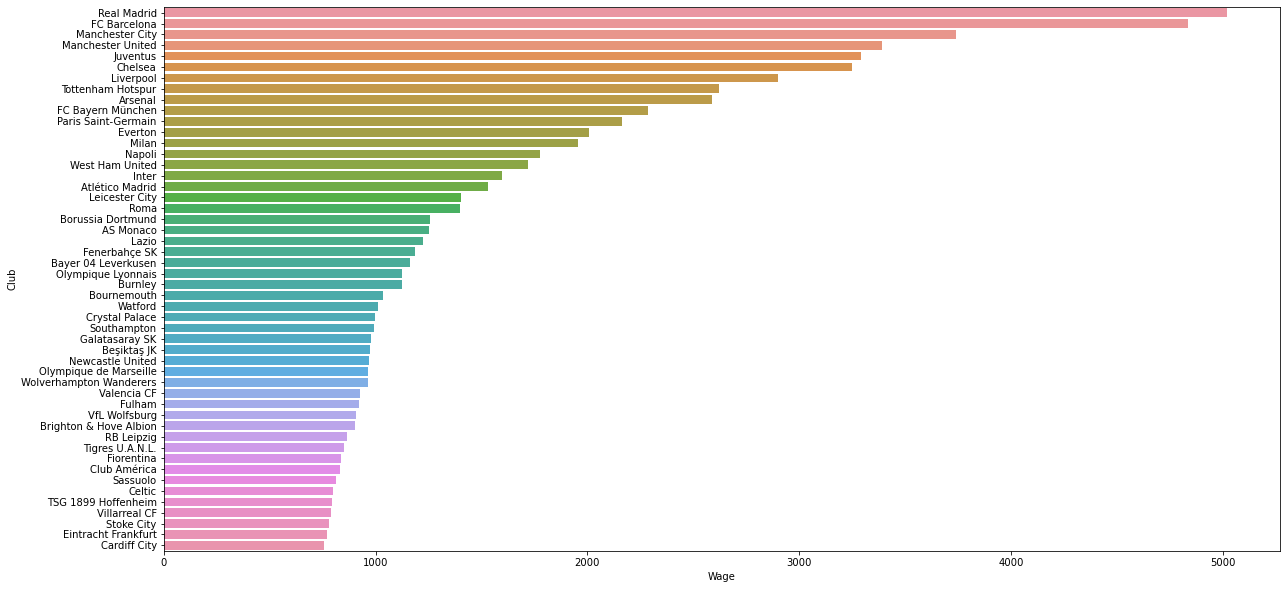

In [32]:
group3 = df.groupby('Club')['Wage'].sum().reset_index().sort_values('Wage', ascending = False).head(50)
plt.figure(figsize = (20,10))
sns.barplot(x = 'Wage', y = 'Club', data = group3)

In [50]:
group3 = df.groupby(['Club'])[['Wage']]
cmed= group3.sum().sort_values(by=['Wage'], ascending = False)

In [58]:
cmed.describe()

,Wage
count,651.000000
mean,272.038402
std,499.444787
min,19.000000
25%,60.500000
50%,108.000000
75%,261.500000
max,5017.000000


In [79]:
club3=list(cmed.query('Wage>=108 & Wage<261.5').index)
club3
club4=list(cmed.query('Wage>=60.5 & Wage <108').index)
club5=list(cmed.query('Wage<60.5').index)

In [81]:
df.columns

Index(['Name', 'Age', 'Overall', 'Club', 'Value', 'Wage', 'Club_4W', 'Club_4V',
       'Position_Class', 'Special', 'Jersey Number', 'Joined', 'Composure',
       'Loaned', 'Age_C', 'Over_C', 'Special_Score5', 'Real_Face'],
      dtype='object')

In [82]:
df.Club_4W.unique()

array([3, 1, 2, 0], dtype=int64)

In [ ]:
# 으아 됐다아아아아아 ㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠ
for i in range(len(df)):
    if df1.iloc[i, 9] == 'Forward':
        df1.iloc[i, 86] = df1.iloc[i,83]
    elif df1.iloc[i, 9] == 'Midfielder':
        df1.iloc[i, 86] = df1.iloc[i,84]
    elif df1.iloc[i, 9] == 'Defender':
        df1.iloc[i, 86] = df1.iloc[i,85]
#     elif df1.iloc[i, 9] == 'GoalKeeper':
#         df1.iloc[i, 86] = df1.iloc[i,2]

In [77]:
club1=['Real Madrid',
 'FC Barcelona',
 'Manchester City',
 'Manchester United',
 'Juventus',
 'Chelsea',
 'Liverpool',
 'Tottenham Hotspur',
 'Arsenal',
 'FC Bayern München',
 'Paris Saint-Germain',
 'Everton',
 'Milan',
 'Napoli',
 'West Ham United',
 'Inter',
 'Atlético Madrid',
 'Leicester City',
 'Roma',
 'Borussia Dortmund',
 'AS Monaco',
 'Lazio',
 'Fenerbahçe SK',
 'Bayer 04 Leverkusen',
 'Olympique Lyonnais',
 'Burnley',
 'Bournemouth',
 'Watford',
 'Crystal Palace',
 'Southampton']

In [78]:
club2=['Galatasaray SK',
 'Beşiktaş JK',
 'Newcastle United',
 'Olympique de Marseille',
 'Wolverhampton Wanderers',
 'Valencia CF',
 'Fulham',
 'VfL Wolfsburg',
 'Brighton & Hove Albion',
 'RB Leipzig',
 'Tigres U.A.N.L.',
 'Fiorentina',
 'Club América',
 'Sassuolo',
 'Celtic',
 'TSG 1899 Hoffenheim',
 'Villarreal CF',
 'Stoke City',
 'Eintracht Frankfurt',
 'Cardiff City',
 'Nottingham Forest',
 'Torino',
 'Middlesbrough',
 'Huddersfield Town',
 'FC Schalke 04',
 'FC Girondins de Bordeaux',
 'Sampdoria',
 'Parma',
 'Rangers FC',
 'Real Sociedad',
 'Girona FC',
 'Derby County',
 'Borussia Mönchengladbach',
 'Bologna',
 'Real Betis',
 'CD Leganés',
 'Monterrey',
 'Leeds United',
 'SV Werder Bremen',
 'Cagliari',
 'VfB Stuttgart',
 'SD Eibar',
 'Hannover 96',
 'Sevilla FC',
 'Levante UD',
 'Medipol Başakşehir FK',
 'Al Hilal',
 'Athletic Club de Bilbao',
 'Hertha BSC',
 'West Bromwich Albion',
 'OGC Nice',
 'Wigan Athletic',
 'Stade Rennais FC',
 'Atlético Mineiro',
 'RC Celta',
 'FC Nantes',
 'Atalanta',
 'Rayo Vallecano',
 '1. FSV Mainz 05',
 'Boca Juniors',
 'Toulouse Football Club',
 'Getafe CF',
 'Bristol City',
 'AS Saint-Étienne',
 'Deportivo Alavés',
 'RCD Espanyol',
 'Udinese',
 'Aston Villa',
 'Fortuna Düsseldorf',
 'Al Ahli',
 'Sporting CP',
 'Grêmio',
 'Guangzhou Evergrande Taobao FC',
 'Trabzonspor',
 'FC Red Bull Salzburg',
 'Guadalajara',
 'FC Augsburg',
 'SC Freiburg',
 'Al Nassr',
 'Norwich City',
 'Brentford',
 'Swansea City',
 'FC Porto',
 'Sheffield Wednesday',
 'Internacional',
 'Independiente',
 'Cruzeiro',
 '1. FC Union Berlin',
 'Montpellier HSC',
 'Fluminense',
 'Angers SCO',
 'Club Brugge KV',
 '1. FC Köln',
 'SD Huesca',
 'Al Ittihad',
 'FC Basel 1893',
 'Stade Malherbe Caen',
 'Blackburn Rovers',
 'Reading',
 'LOSC Lille',
 'Ajax',
 'Real Valladolid CF',
 'Racing Club',
 'SC Braga',
 'Frosinone',
 'Göztepe SK',
 'Club León',
 'Pachuca',
 'En Avant de Guingamp',
 'River Plate',
 'SL Benfica',
 'Genoa',
 'Deportivo Toluca',
 'Cruz Azul',
 'MKE Ankaragücü',
 'Vitesse',
 'KAA Gent',
 'RSC Anderlecht',
 '1. FC Nürnberg',
 'Birmingham City',
 'Chievo Verona',
 'FC Ingolstadt 04',
 'Hull City',
 'PSV',
 'Bursaspor',
 'Empoli',
 'Santos Laguna',
 'Standard de Liège',
 'Botafogo',
 'Amiens SC',
 'SPAL',
 'RC Strasbourg Alsace',
 'Al Wehda']

In [83]:
df.insert(7,'Club_5',
            df.apply(lambda x: 
            4 if x['Club'] in club1
            else 3 if x['Club'] in club2
            else 2 if x['Club'] in club3
            else 1 if x['Club'] in club4
            else 0, axis =1))

In [57]:
df.Club.value_counts()

Wolverhampton Wanderers    33
Liverpool                  33
Newcastle United           33
TSG 1899 Hoffenheim        33
Burnley                    33
                           ..
Ceará Sporting Club        20
Vitória                    20
Limerick FC                19
Sligo Rovers               19
Derry City                 18
Name: Club, Length: 651, dtype: int64

In [80]:
club_t=df[df.Club=='Wigan Athletic'].sort_values(by='Wage', ascending=False)
club_t

,Name,Age,Overall,Club,Value,Wage,Club_4W,Club_4V,Position_Class,Special,Jersey Number,Joined,Composure,Loaned,Age_C,Over_C,Special_Score5,Real_Face
4037,J. Garner,30,71,Wigan Athletic,2300.0,35.0,3,2,Forward,1872,41.0,2018-08-09,68.0,1,6,3,2011.0,0
3457,J. Windass,24,72,Wigan Athletic,4300.0,32.0,3,2,Midfielder,1868,10.0,2018-08-09,68.0,1,3,3,2014.0,0
3632,N. Powell,24,72,Wigan Athletic,4100.0,32.0,3,2,Midfielder,1858,25.0,2016-07-12,69.0,1,3,3,2003.0,1
5031,W. Grigg,26,70,Wigan Athletic,2100.0,30.0,3,2,Forward,1697,9.0,2015-07-14,69.0,1,4,3,1837.0,0
5870,J. Vaughan,29,69,Wigan Athletic,1100.0,27.0,3,2,Forward,1796,8.0,2018-01-12,69.0,1,5,3,1934.0,0
4953,C. Dunkley,26,70,Wigan Athletic,1800.0,26.0,3,2,Defender,1535,22.0,2017-07-01,48.0,1,4,3,1656.0,0
4408,D. Burn,26,71,Wigan Athletic,2400.0,25.0,3,2,Defender,1509,33.0,NaN,62.0,0,4,3,1644.0,0
5799,M. Jacobs,26,69,Wigan Athletic,1100.0,24.0,3,2,Midfielder,1888,17.0,2015-07-27,60.0,1,4,3,2017.0,0
6071,D. Gibson,30,69,Wigan Athletic,975.0,24.0,3,2,Midfielder,1882,4.0,2018-08-03,80.0,1,6,3,2031.0,1
6122,C. McManaman,27,69,Wigan Athletic,1100.0,24.0,3,2,Midfielder,1655,15.0,2018-07-20,67.0,1,5,3,1791.0,1


In [52]:
overall=df[(df.Overall>=85)&].sort_values(by='Wage', ascending=False)
l_overall.tail(30)

['Real Madrid',
 'FC Barcelona',
 'Manchester City',
 'Manchester United',
 'Juventus',
 'Chelsea',
 'Liverpool',
 'Tottenham Hotspur',
 'Arsenal',
 'FC Bayern München',
 'Paris Saint-Germain',
 'Everton',
 'Milan',
 'Napoli',
 'West Ham United',
 'Inter',
 'Atlético Madrid',
 'Leicester City',
 'Roma',
 'Borussia Dortmund',
 'AS Monaco',
 'Lazio',
 'Fenerbahçe SK',
 'Bayer 04 Leverkusen',
 'Olympique Lyonnais',
 'Burnley',
 'Bournemouth',
 'Watford',
 'Crystal Palace',
 'Southampton',
 'Galatasaray SK',
 'Beşiktaş JK',
 'Newcastle United',
 'Olympique de Marseille',
 'Wolverhampton Wanderers',
 'Valencia CF',
 'Fulham',
 'VfL Wolfsburg',
 'Brighton & Hove Albion',
 'RB Leipzig',
 'Tigres U.A.N.L.',
 'Fiorentina',
 'Club América',
 'Sassuolo',
 'Celtic',
 'TSG 1899 Hoffenheim',
 'Villarreal CF',
 'Stoke City',
 'Eintracht Frankfurt',
 'Cardiff City',
 'Nottingham Forest',
 'Torino',
 'Middlesbrough',
 'Huddersfield Town',
 'FC Schalke 04',
 'FC Girondins de Bordeaux',
 'Sampdoria',
 'P

In [ ]:
club40=df[df.Club=='Cardiff City'].sort_values(by='Wage', ascending=False)
club40

In [34]:
club50=df[df.Club=='Cardiff City'].sort_values(by='Wage', ascending=False)
club50

,Name,Age,Overall,Club,Value,Wage,Club_4W,Club_4V,Position_Class,Special,Jersey Number,Joined,Composure,Loaned,Age_C,Over_C,Special_Score5,Real_Face
1876,H. Arter,28,75,Cardiff City,6500.0,55.0,3,3,Midfielder,1991,22.0,NaN,73.0,0,5,4,2139.0,1
2107,J. Hoilett,28,74,Cardiff City,5500.0,44.0,3,3,Midfielder,1896,10.0,2016-10-10,66.0,1,5,4,2036.0,1
1849,S. Bamba,33,75,Cardiff City,2700.0,38.0,3,3,Defender,1444,22.0,2016-10-11,64.0,1,7,4,1583.0,1
2293,B. Ecuélé Manga,29,74,Cardiff City,4400.0,37.0,3,3,Defender,1518,5.0,2014-09-01,67.0,1,5,4,1659.0,1
3167,B. Reid,25,73,Cardiff City,5500.0,37.0,3,3,Forward,1979,14.0,2018-06-28,65.0,1,4,4,2122.0,1
2159,G. Cunningham,27,74,Cardiff City,5000.0,35.0,3,3,Defender,1890,18.0,2018-06-13,72.0,1,5,4,2037.0,1
2388,S. Morrison,27,74,Cardiff City,5500.0,35.0,3,3,Defender,1483,4.0,2014-08-15,57.0,1,5,4,1616.0,1
3175,A. Gunnarsson,29,73,Cardiff City,3100.0,34.0,3,3,Midfielder,1921,17.0,2011-07-09,65.0,1,5,4,2059.0,1
2451,J. Ralls,24,74,Cardiff City,7500.0,34.0,3,3,Midfielder,1963,8.0,2011-10-01,67.0,1,3,4,2109.0,1
4426,N. Mendez-Laing,26,71,Cardiff City,2800.0,30.0,3,3,Forward,1733,19.0,2017-07-01,61.0,1,4,3,1866.0,1
